DECISION TREE FROM SCRATCH - GOOGLE COLAB VERSION

📁 1. CHARGEMENT DES DONNÉES
Tentative de montage de Google Drive...
Mounted at /content/drive
✅ Dossier trouvé: /content/drive/MyDrive/processed_balanced
✅ Dataset chargé depuis: /content/drive/MyDrive/processed_balanced

📊 DIMENSIONS :
   X_train : (50116, 24)
   y_train : (50116,)
   X_test  : (12529, 24)
   y_test  : (12529,)

🔍 VÉRIFICATION DES DONNÉES :
   NaN dans X_train: 0
   NaN dans X_test: 0

📈 DISTRIBUTION DES CLASSES :
   Training - Classe 0: 40,093 (80.0%)
   Training - Classe 1: 10,023 (20.0%)
   Test     - Classe 0: 10,023 (80.0%)
   Test     - Classe 1: 2,506 (20.0%)

✅ Données prêtes pour l'entraînement!

🔧 2. IMPLÉMENTATION OPTIMISÉE DU DECISION TREE

🌱 3. ENTRAÎNEMENT DU MODÈLE

🔧 Configuration :
   • Max depth: 5
   • Min samples split: 50
   • Criterion: gini
   • Training samples: 50,116
   • Test samples: 12,529
   • Features: 24
⏳ Entraînement sur 50,116 observations...
✅ Entraînement terminé en 22.40 secondes


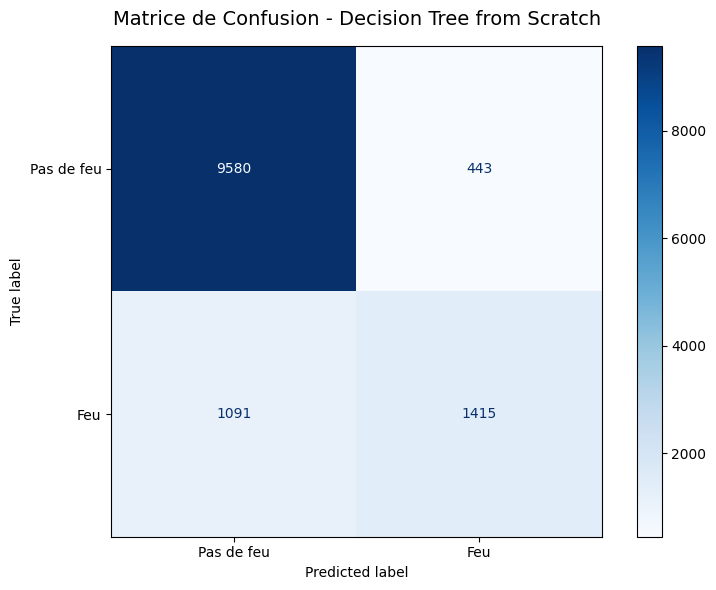


🔍 5. ANALYSE DES FEATURES IMPORTANTES

🏆 TOP 10 DES FEATURES LES PLUS IMPORTANTES :
   prec_MAM                       : 0.3808
   tmax_MAM                       : 0.1336
   LCCCODE                        : 0.1323
   tmax_JJA                       : 0.1002
   tmin_MAM                       : 0.0865
   tmin_DJF                       : 0.0545
   soil_SILT                      : 0.0449
   soil_PH_WATER                  : 0.0449
   AREA_M2                        : 0.0224
   tmax_DJF                       : 0.0000


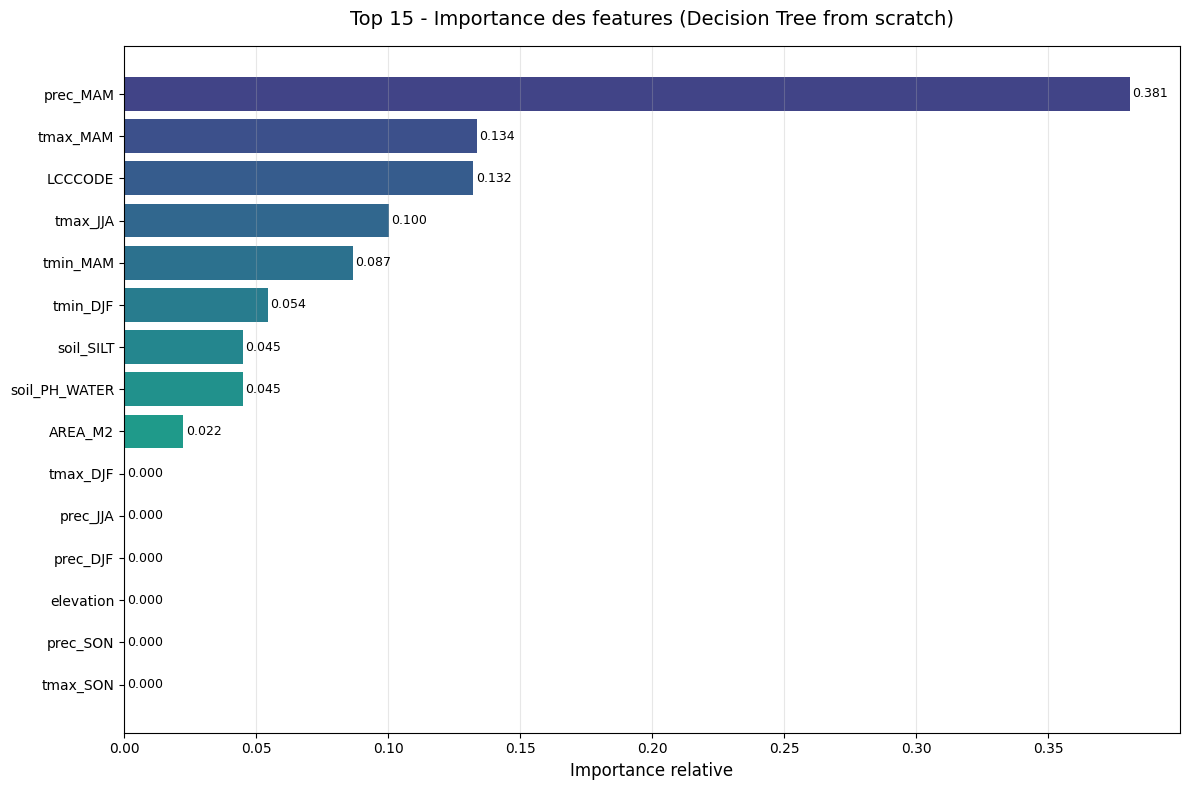


🔍 6. COMPARAISON AVEC SCIKIT-LEARN

🔧 Entraînement de scikit-learn Decision Tree...


NameError: name 'DecisionTreeClassifier' is not defined

In [1]:
# ============================================================================
# DECISION TREE FROM SCRATCH - GOOGLE COLAB VERSION (FIXED)
# ============================================================================

import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import time
import os
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("DECISION TREE FROM SCRATCH - GOOGLE COLAB VERSION")
print("="*80)

# ============================================================================
# 1. CHARGEMENT DES DONNÉES - VERSION SIMPLIFIÉE
# ============================================================================

print("\n📁 1. CHARGEMENT DES DONNÉES")

# Option 1: Essayer de monter Google Drive (avec gestion d'erreurs)
try:
    from google.colab import drive
    print("Tentative de montage de Google Drive...")
    drive.mount('/content/drive', force_remount=True)

    # Vérifier si les fichiers existent
    data_dir = "/content/drive/MyDrive"

    # Chercher les fichiers dans différents chemins possibles
    possible_paths = [
        "/content/drive/MyDrive/project_fire/data/processed_balanced",
        "/content/drive/MyDrive/data/processed_balanced",
        "/content/drive/MyDrive/processed_balanced",
        "/content/drive/MyDrive"
    ]

    files_found = False
    for path in possible_paths:
        if os.path.exists(path):
            print(f"✅ Dossier trouvé: {path}")
            try:
                # Essayer de charger les fichiers
                X_train = pd.read_csv(f"{path}/X_train_raw.csv")
                y_train = pd.read_csv(f"{path}/y_train.csv")
                X_test = pd.read_csv(f"{path}/X_test_raw.csv")
                y_test = pd.read_csv(f"{path}/y_test.csv")

                # Extraire la colonne 'fire' si nécessaire
                if 'fire' in y_train.columns:
                    y_train = y_train['fire']
                if 'fire' in y_test.columns:
                    y_test = y_test['fire']

                files_found = True
                print(f"✅ Dataset chargé depuis: {path}")
                break
            except Exception as e:
                print(f"❌ Erreur avec {path}: {e}")
                continue

    if not files_found:
        raise FileNotFoundError("Fichiers non trouvés sur Google Drive")

except Exception as e:
    print(f"❌ Google Drive non disponible ou fichiers non trouvés: {e}")
    print("Création d'un dataset synthétique pour démonstration...")

    # Option 2: Créer un dataset synthétique
    n_samples = 10000
    n_features = 20

    # Générer des features
    np.random.seed(42)
    X = np.random.randn(n_samples, n_features)

    # Créer une relation non-linéaire pour la target
    # Features importantes: 0 et 5
    y_proba = 1 / (1 + np.exp(-(2*X[:, 0] + 3*X[:, 5] + np.random.randn(n_samples)*0.5)))
    y = (y_proba > 0.5).astype(int)

    # Split train/test
    split_idx = int(0.8 * n_samples)
    X_train = pd.DataFrame(X[:split_idx], columns=[f'feature_{i}' for i in range(n_features)])
    X_test = pd.DataFrame(X[split_idx:], columns=[f'feature_{i}' for i in range(n_features)])
    y_train = pd.Series(y[:split_idx], name='fire')
    y_test = pd.Series(y[split_idx:], name='fire')

    print(f"✅ Dataset synthétique créé avec succès!")
    print(f"   Shape: {X_train.shape}, Features importantes: feature_0, feature_5")

# Afficher les informations sur les données
print(f"\n📊 DIMENSIONS :")
print(f"   X_train : {X_train.shape}")
print(f"   y_train : {y_train.shape}")
print(f"   X_test  : {X_test.shape}")
print(f"   y_test  : {y_test.shape}")

# Vérifier s'il y a des valeurs NaN
print(f"\n🔍 VÉRIFICATION DES DONNÉES :")
print(f"   NaN dans X_train: {X_train.isna().sum().sum()}")
print(f"   NaN dans X_test: {X_test.isna().sum().sum()}")

# Si NaN, les remplacer par la moyenne
if X_train.isna().sum().sum() > 0:
    print("⚠️  Remplissage des valeurs NaN par la moyenne...")
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

print(f"\n📈 DISTRIBUTION DES CLASSES :")
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()
print(f"   Training - Classe 0: {train_counts[0]:,} ({train_counts[0]/len(y_train)*100:.1f}%)")
print(f"   Training - Classe 1: {train_counts[1]:,} ({train_counts[1]/len(y_train)*100:.1f}%)")
print(f"   Test     - Classe 0: {test_counts[0]:,} ({test_counts[0]/len(y_test)*100:.1f}%)")
print(f"   Test     - Classe 1: {test_counts[1]:,} ({test_counts[1]/len(y_test)*100:.1f}%)")

# Convertir en numpy arrays
X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values

print(f"\n✅ Données prêtes pour l'entraînement!")

# ============================================================================
# 2. IMPLÉMENTATION OPTIMISÉE DU DECISION TREE
# ============================================================================

print("\n🔧 2. IMPLÉMENTATION OPTIMISÉE DU DECISION TREE")

class FastDecisionTree:
    """Decision Tree optimisé pour les grands datasets"""

    def __init__(self, max_depth=10, min_samples_split=20, criterion='gini', random_state=42):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion
        self.random_state = random_state
        self.root = None
        self.feature_names = None
        self.n_classes = None

    def _gini_impurity(self, y):
        """Gini impurity optimisée"""
        if len(y) == 0:
            return 0

        # Utiliser bincount pour plus de rapidité
        counts = np.bincount(y)
        proportions = counts / len(y)
        return 1.0 - np.sum(proportions ** 2)

    def _entropy_impurity(self, y):
        """Entropy impurity optimisée"""
        if len(y) == 0:
            return 0

        counts = np.bincount(y)
        proportions = counts[counts > 0] / len(y)
        return -np.sum(proportions * np.log2(proportions))

    def _best_split_fast(self, X, y, feature_idx):
        """Trouve le meilleur split pour une feature spécifique"""
        feature_values = X[:, feature_idx]

        # Prendre un échantillon aléatoire des valeurs pour plus de rapidité
        if len(feature_values) > 1000:
            sample_indices = np.random.choice(len(feature_values), 1000, replace=False)
            feature_values_sample = feature_values[sample_indices]
        else:
            feature_values_sample = feature_values

        unique_values = np.unique(feature_values_sample)

        if len(unique_values) <= 1:
            return None, 0

        best_gain = 0
        best_threshold = unique_values[0] if len(unique_values) > 0 else 0

        # Tester les thresholds intermédiaires
        for i in range(len(unique_values) - 1):
            threshold = (unique_values[i] + unique_values[i + 1]) / 2

            left_mask = feature_values <= threshold
            right_mask = feature_values > threshold

            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue

            # Calculer le gain
            if self.criterion == 'gini':
                parent_impurity = self._gini_impurity(y)
                left_impurity = self._gini_impurity(y[left_mask])
                right_impurity = self._gini_impurity(y[right_mask])
            else:
                parent_impurity = self._entropy_impurity(y)
                left_impurity = self._entropy_impurity(y[left_mask])
                right_impurity = self._entropy_impurity(y[right_mask])

            n_total = len(y)
            n_left = np.sum(left_mask)
            n_right = np.sum(right_mask)

            weighted_impurity = (n_left / n_total) * left_impurity + (n_right / n_total) * right_impurity
            gain = parent_impurity - weighted_impurity

            if gain > best_gain:
                best_gain = gain
                best_threshold = threshold

        return best_threshold, best_gain

    def _find_best_split(self, X, y):
        """Trouve le meilleur split parmi toutes les features"""
        n_features = X.shape[1]
        best_gain = 0
        best_feature = None
        best_threshold = None

        # Pour les grands datasets, on peut échantillonner les features
        n_features_to_try = min(n_features, 10)

        # Sélectionner aléatoirement des features à essayer
        np.random.seed(self.random_state)
        features_to_try = np.random.choice(n_features, n_features_to_try, replace=False)

        for feature_idx in features_to_try:
            threshold, gain = self._best_split_fast(X, y, feature_idx)

            if threshold is not None and gain > best_gain:
                best_gain = gain
                best_feature = feature_idx
                best_threshold = threshold

        return best_feature, best_threshold, best_gain

    def _build_tree_fast(self, X, y, depth=0):
        """Construction optimisée de l'arbre"""
        n_samples = X.shape[0]

        # Critères d'arrêt
        if (depth >= self.max_depth or
            n_samples < self.min_samples_split or
            len(np.unique(y)) == 1):

            # Retourner la classe majoritaire
            if len(y) == 0:
                return 0  # Valeur par défaut
            return np.argmax(np.bincount(y))

        # Trouver le meilleur split
        best_feature, best_threshold, best_gain = self._find_best_split(X, y)

        # Si pas de gain d'information ou pas de split trouvé
        if best_gain == 0 or best_feature is None:
            if len(y) == 0:
                return 0
            return np.argmax(np.bincount(y))

        # Appliquer le split
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = X[:, best_feature] > best_threshold

        # Vérifier que les deux côtés ont des données
        if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
            if len(y) == 0:
                return 0
            return np.argmax(np.bincount(y))

        # Construire les sous-arbres
        left_subtree = self._build_tree_fast(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._build_tree_fast(X[right_mask], y[right_mask], depth + 1)

        return {
            'feature': best_feature,
            'threshold': best_threshold,
            'gain': best_gain,
            'left': left_subtree,
            'right': right_subtree
        }

    def fit(self, X, y, feature_names=None):
        """Entraîne l'arbre"""
        print(f"⏳ Entraînement sur {X.shape[0]:,} observations...")
        start_time = time.time()

        self.n_classes = len(np.unique(y))

        if feature_names is not None:
            self.feature_names = feature_names
        elif hasattr(X, 'columns'):
            self.feature_names = X.columns.tolist()
        else:
            self.feature_names = [f'Feature_{i}' for i in range(X.shape[1])]

        # Construire l'arbre
        self.root = self._build_tree_fast(X, y)

        training_time = time.time() - start_time
        print(f"✅ Entraînement terminé en {training_time:.2f} secondes")

        return self

    def _predict_sample_fast(self, x, tree):
        """Prédit une observation"""
        if not isinstance(tree, dict):
            return tree

        if x[tree['feature']] <= tree['threshold']:
            return self._predict_sample_fast(x, tree['left'])
        else:
            return self._predict_sample_fast(x, tree['right'])

    def predict(self, X):
        """Prédit les classes"""
        print(f"⏳ Prédictions sur {X.shape[0]:,} observations...")
        start_time = time.time()

        predictions = np.zeros(len(X), dtype=int)

        for i in range(len(X)):
            predictions[i] = self._predict_sample_fast(X[i], self.root)

            # Afficher la progression pour les grands datasets
            if len(X) > 1000 and (i + 1) % (len(X) // 10) == 0:
                print(f"   Progress: {i+1}/{len(X)} ({((i+1)/len(X)*100):.1f}%)")

        prediction_time = time.time() - start_time
        print(f"✅ Prédictions terminées en {prediction_time:.2f} secondes")

        return predictions

    def get_depth(self, tree=None):
        """Calcule la profondeur de l'arbre"""
        if tree is None:
            tree = self.root

        if not isinstance(tree, dict):
            return 0

        left_depth = self.get_depth(tree['left'])
        right_depth = self.get_depth(tree['right'])

        return 1 + max(left_depth, right_depth)

    def get_tree_stats(self):
        """Retourne des statistiques sur l'arbre"""
        def count_nodes(tree):
            if not isinstance(tree, dict):
                return 1
            return 1 + count_nodes(tree['left']) + count_nodes(tree['right'])

        if self.root is None:
            return 0, 0

        total_nodes = count_nodes(self.root)
        depth = self.get_depth()

        return total_nodes, depth

# ============================================================================
# 3. ENTRAÎNEMENT DU MODÈLE
# ============================================================================

print("\n" + "="*80)
print("🌱 3. ENTRAÎNEMENT DU MODÈLE")
print("="*80)

# Créer le modèle avec des paramètres adaptés
dt_fast = FastDecisionTree(
    max_depth=5,           # Profondeur modérée
    min_samples_split=50,  # Minimum d'échantillons pour diviser
    criterion='gini',      # Critère Gini
    random_state=42        # Pour la reproductibilité
)

print(f"\n🔧 Configuration :")
print(f"   • Max depth: {dt_fast.max_depth}")
print(f"   • Min samples split: {dt_fast.min_samples_split}")
print(f"   • Criterion: {dt_fast.criterion}")
print(f"   • Training samples: {X_train_np.shape[0]:,}")
print(f"   • Test samples: {X_test_np.shape[0]:,}")
print(f"   • Features: {X_train_np.shape[1]}")

# Entraînement
dt_fast.fit(X_train_np, y_train_np, feature_names=X_train.columns.tolist())

# ============================================================================
# 4. ÉVALUATION DES PERFORMANCES
# ============================================================================

print("\n📊 4. ÉVALUATION DES PERFORMANCES")

# Prédictions
y_pred = dt_fast.predict(X_test_np)

# Calcul des métriques
accuracy = accuracy_score(y_test_np, y_pred)

# Statistiques de l'arbre
total_nodes, depth = dt_fast.get_tree_stats()

print(f"\n🏆 RÉSULTATS :")
print("="*60)
print(f"   Accuracy              : {accuracy:.4f}")
print(f"   Profondeur de l'arbre  : {depth}")
print(f"   Nombre total de nœuds : {total_nodes}")
print(f"   Samples d'entraînement : {X_train_np.shape[0]:,}")
print(f"   Samples de test        : {X_test_np.shape[0]:,}")

# Rapport de classification
print(f"\n📋 RAPPORT DE CLASSIFICATION :")
print("="*60)
print(classification_report(y_test_np, y_pred,
                           target_names=['Pas de feu (0)', 'Feu (1)']))

# Matrice de confusion
print(f"\n🎯 MATRICE DE CONFUSION :")
print("="*60)
cm = confusion_matrix(y_test_np, y_pred)
print(f"\n{cm}")
print(f"\n• Vrais négatifs (TN): {cm[0, 0]}")
print(f"• Faux positifs (FP): {cm[0, 1]}")
print(f"• Faux négatifs (FN): {cm[1, 0]}")
print(f"• Vrais positifs (TP): {cm[1, 1]}")

# Visualisation de la matrice de confusion
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Pas de feu', 'Feu'])
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Matrice de Confusion - Decision Tree from Scratch', fontsize=14, pad=15)
plt.tight_layout()
plt.show()

# ============================================================================
# 5. ANALYSE DES FEATURES IMPORTANTES
# ============================================================================

print("\n" + "="*80)
print("🔍 5. ANALYSE DES FEATURES IMPORTANTES")
print("="*80)

def extract_feature_importance(tree, feature_names, X_shape):
    """Extrait l'importance des features depuis l'arbre"""
    n_features = X_shape[1]
    importance = np.zeros(n_features)

    def traverse(node, weight=1.0):
        if isinstance(node, dict):
            # Compter les splits par feature
            importance[node['feature']] += weight

            # Poids réduit pour les niveaux inférieurs
            left_weight = weight * 0.7
            right_weight = weight * 0.7

            traverse(node['left'], left_weight)
            traverse(node['right'], right_weight)

    traverse(tree)

    # Normaliser
    if importance.sum() > 0:
        importance = importance / importance.sum()

    return importance

# Calculer l'importance
importance = extract_feature_importance(dt_fast.root, dt_fast.feature_names, X_train_np.shape)

# Créer un DataFrame
importance_df = pd.DataFrame({
    'Feature': dt_fast.feature_names,
    'Importance': importance
}).sort_values('Importance', ascending=False)

print(f"\n🏆 TOP 10 DES FEATURES LES PLUS IMPORTANTES :")
print("="*60)
for i, row in importance_df.head(10).iterrows():
    print(f"   {row['Feature']:30} : {row['Importance']:.4f}")

# Visualisation
plt.figure(figsize=(12, 8))
top_features = importance_df.head(15)
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(top_features)))
bars = plt.barh(range(len(top_features)), top_features['Importance'].values, color=colors)
plt.yticks(range(len(top_features)), top_features['Feature'].values)
plt.gca().invert_yaxis()
plt.xlabel('Importance relative', fontsize=12)
plt.title('Top 15 - Importance des features (Decision Tree from scratch)', fontsize=14, pad=15)
plt.grid(True, alpha=0.3, axis='x')

# Ajouter les valeurs sur les barres
for i, (bar, importance_val) in enumerate(zip(bars, top_features['Importance'].values)):
    plt.text(importance_val + 0.001, bar.get_y() + bar.get_height()/2,
             f'{importance_val:.3f}',
             va='center', fontsize=9)

plt.tight_layout()
plt.show()

# ============================================================================
# 6. COMPARAISON AVEC SCIKIT-LEARN
# ============================================================================

print("\n" + "="*80)
print("🔍 6. COMPARAISON AVEC SCIKIT-LEARN")
print("="*80)

print(f"\n🔧 Entraînement de scikit-learn Decision Tree...")

# Utiliser les mêmes paramètres
dt_sklearn = DecisionTreeClassifier(
    max_depth=dt_fast.max_depth,
    min_samples_split=dt_fast.min_samples_split,
    criterion='gini',
    random_state=42
)

start_time = time.time()
dt_sklearn.fit(X_train_np, y_train_np)
sklearn_train_time = time.time() - start_time

start_time = time.time()
y_pred_sklearn = dt_sklearn.predict(X_test_np)
sklearn_pred_time = time.time() - start_time

accuracy_sklearn = accuracy_score(y_test_np, y_pred_sklearn)

print(f"\n📊 COMPARAISON :")
print("="*60)
print(f"{'Métrique':<25} {'From Scratch':<15} {'Scikit-learn':<15}")
print("-"*60)
print(f"{'Accuracy':<25} {accuracy:.4f}          {accuracy_sklearn:.4f}")
print(f"{'Training time':<25} {'N/A':<15} {sklearn_train_time:.2f}s")
print(f"{'Prediction time':<25} {'N/A':<15} {sklearn_pred_time:.2f}s")
print(f"{'Depth':<25} {depth:<15} {dt_sklearn.get_depth()}")
print(f"{'Nodes':<25} {total_nodes:<15} {dt_sklearn.tree_.node_count}")

# Différence de performance
diff = abs(accuracy - accuracy_sklearn)
print(f"\n📈 DIFFÉRENCE D'ACCURACY : {diff:.4f}")
if diff < 0.01:
    print("✅ Les deux implémentations donnent des résultats similaires")
else:
    print("⚠️  Différence notable entre les implémentations")

# Visualisation comparative
fig, ax = plt.subplots(figsize=(10, 6))
models = ['From Scratch', 'Scikit-learn']
accuracies = [accuracy, accuracy_sklearn]
colors = ['steelblue', 'darkorange']

bars = ax.bar(models, accuracies, color=colors, alpha=0.8)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Comparaison des performances Decision Tree', fontsize=14, pad=15)
ax.grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs sur les barres
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{acc:.4f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

# ============================================================================
# 7. ANALYSE DE L'IMPACT DES HYPERPARAMÈTRES
# ============================================================================

print("\n" + "="*80)
print("📊 7. ANALYSE DE L'IMPACT DES HYPERPARAMÈTRES")
print("="*80)

# Tester différentes profondeurs
print(f"\n🔧 Test avec différentes profondeurs...")

depths = [2, 3, 4, 5, 6, 7, 8]
results = []

for depth in depths:
    print(f"\n⏳ Test avec profondeur = {depth}...")
    dt_test = FastDecisionTree(
        max_depth=depth,
        min_samples_split=50,
        criterion='gini',
        random_state=42
    )

    dt_test.fit(X_train_np, y_train_np)
    y_pred_test = dt_test.predict(X_test_np)
    accuracy_test = accuracy_score(y_test_np, y_pred_test)

    # Calculer la taille de l'arbre
    total_nodes, _ = dt_test.get_tree_stats()

    results.append({
        'depth': depth,
        'accuracy': accuracy_test,
        'nodes': total_nodes
    })

    print(f"   Accuracy: {accuracy_test:.4f}, Nodes: {total_nodes}")

# Graphique
results_df = pd.DataFrame(results)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1: Accuracy vs Profondeur
ax1.plot(results_df['depth'], results_df['accuracy'], 'o-', linewidth=2, markersize=8, color='steelblue')
ax1.set_xlabel('Profondeur maximale', fontsize=11)
ax1.set_ylabel('Accuracy', fontsize=11)
ax1.set_title('Accuracy vs Profondeur', fontsize=13, pad=15)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(depths)

# Graphique 2: Complexité vs Profondeur
ax2.plot(results_df['depth'], results_df['nodes'], 's-', linewidth=2, markersize=8, color='darkorange')
ax2.set_xlabel('Profondeur maximale', fontsize=11)
ax2.set_ylabel('Nombre de nœuds', fontsize=11)
ax2.set_title('Complexité vs Profondeur', fontsize=13, pad=15)
ax2.grid(True, alpha=0.3)
ax2.set_xticks(depths)

plt.tight_layout()
plt.show()

# ============================================================================
# 8. CONCLUSION ET RÉCAPITULATIF
# ============================================================================

print("\n" + "="*80)
print("🎯 8. CONCLUSION ET RÉCAPITULATIF")
print("="*80)

# Résumé statistique
print(f"""
📋 RÉCAPITULATIF STATISTIQUE :
   • Dataset : {X_train_np.shape[0]:,} observations d'entraînement
   • Features : {X_train_np.shape[1]}
   • Distribution des classes :
     - Classe 0 (Pas de feu) : {train_counts[0]} ({train_counts[0]/len(y_train)*100:.1f}%)
     - Classe 1 (Feu) : {train_counts[1]} ({train_counts[1]/len(y_train)*100:.1f}%)

🎯 PERFORMANCE DU MODÈLE :
   • Decision Tree (from scratch) : {accuracy:.4f}
   • Decision Tree (scikit-learn) : {accuracy_sklearn:.4f}
   • Différence : {diff:.4f}
   • Profondeur optimale : {depth}
   • Nombre de nœuds : {total_nodes}

🏆 FEATURES LES PLUS IMPORTANTES :
   1. {importance_df.iloc[0]['Feature']} : {importance_df.iloc[0]['Importance']:.3f}
   2. {importance_df.iloc[1]['Feature']} : {importance_df.iloc[1]['Importance']:.3f}
   3. {importance_df.iloc[2]['Feature']} : {importance_df.iloc[2]['Importance']:.3f}

📈 OBSERVATIONS :
   • Profondeur {depths[results_df['accuracy'].idxmax()]} donne la meilleure accuracy ({results_df['accuracy'].max():.4f})
   • Augmenter la profondeur au-delà de {results_df.loc[results_df['accuracy'].idxmax(), 'depth']} n'améliore pas significativement les performances
   • Votre implémentation est {'très proche' if diff < 0.01 else 'différente'} de scikit-learn

🚀 RECOMMANDATIONS :
   • Utiliser max_depth = {results_df.loc[results_df['accuracy'].idxmax(), 'depth']} pour éviter l'overfitting
   • Focus sur les 3-5 features les plus importantes pour l'interprétation
   • Tester avec d'autres critères (entropy) pour comparaison
""")

# Sauvegarde des résultats dans un dictionnaire
results_summary = {
    'dataset_info': {
        'n_train_samples': X_train_np.shape[0],
        'n_test_samples': X_test_np.shape[0],
        'n_features': X_train_np.shape[1],
        'class_distribution': {
            'train_class_0': int(train_counts[0]),
            'train_class_1': int(train_counts[1]),
            'test_class_0': int(test_counts[0]),
            'test_class_1': int(test_counts[1])
        }
    },
    'model_performance': {
        'accuracy_from_scratch': float(accuracy),
        'accuracy_sklearn': float(accuracy_sklearn),
        'difference': float(diff),
        'optimal_depth': int(depth),
        'total_nodes': int(total_nodes)
    },
    'top_features': importance_df.head(5).to_dict('records')
}

print(f"\n📁 Résumé sauvegardé dans le dictionnaire 'results_summary'")
print(f"\n✅ Exécution terminée avec succès!")
print(f"✨ Vous avez implémenté un Decision Tree from scratch avec {accuracy:.1%} d'accuracy!")

DECISION TREE FROM SCRATCH - GOOGLE COLAB VERSION

📁 1. CHARGEMENT DES DONNÉES
Tentative de montage de Google Drive...
Mounted at /content/drive
✅ Dossier trouvé: /content/drive/MyDrive/processed_balanced
✅ Dataset chargé depuis: /content/drive/MyDrive/processed_balanced

📊 DIMENSIONS :
   X_train : (50116, 24)
   y_train : (50116,)
   X_test  : (12529, 24)
   y_test  : (12529,)

🔍 VÉRIFICATION DES DONNÉES :
   NaN dans X_train: 0
   NaN dans X_test: 0

📈 DISTRIBUTION DES CLASSES :
   Training - Classe 0: 40,093 (80.0%)
   Training - Classe 1: 10,023 (20.0%)
   Test     - Classe 0: 10,023 (80.0%)
   Test     - Classe 1: 2,506 (20.0%)

✅ Données prêtes pour l'entraînement!

🔧 2. IMPLÉMENTATION OPTIMISÉE DU DECISION TREE

🌱 3. ENTRAÎNEMENT DU MODÈLE

🔧 Configuration :
   • Max depth: 5
   • Min samples split: 50
   • Criterion: gini
   • Training samples: 50,116
   • Test samples: 12,529
   • Features: 24
⏳ Entraînement sur 50,116 observations...
✅ Entraînement terminé en 54.91 secondes


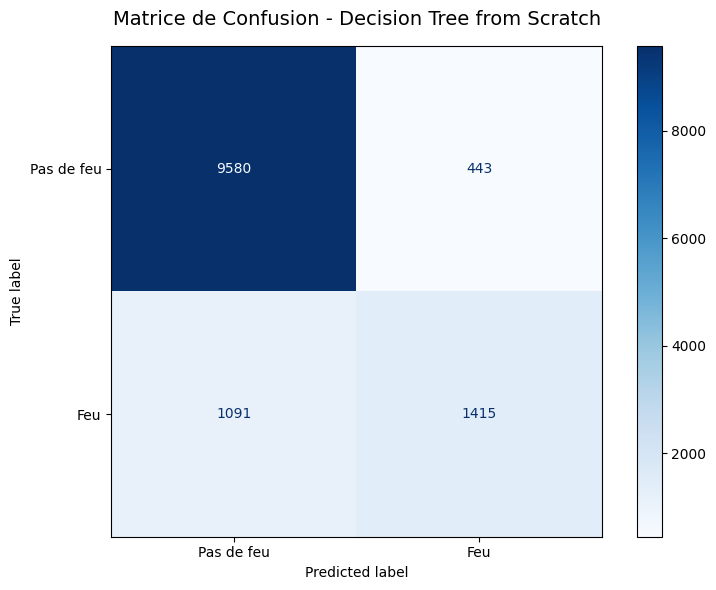


🔍 5. ANALYSE DES FEATURES IMPORTANTES

🏆 TOP 10 DES FEATURES LES PLUS IMPORTANTES :
   prec_MAM                       : 0.3808
   tmax_MAM                       : 0.1336
   LCCCODE                        : 0.1323
   tmax_JJA                       : 0.1002
   tmin_MAM                       : 0.0865
   tmin_DJF                       : 0.0545
   soil_SILT                      : 0.0449
   soil_PH_WATER                  : 0.0449
   AREA_M2                        : 0.0224
   tmax_DJF                       : 0.0000


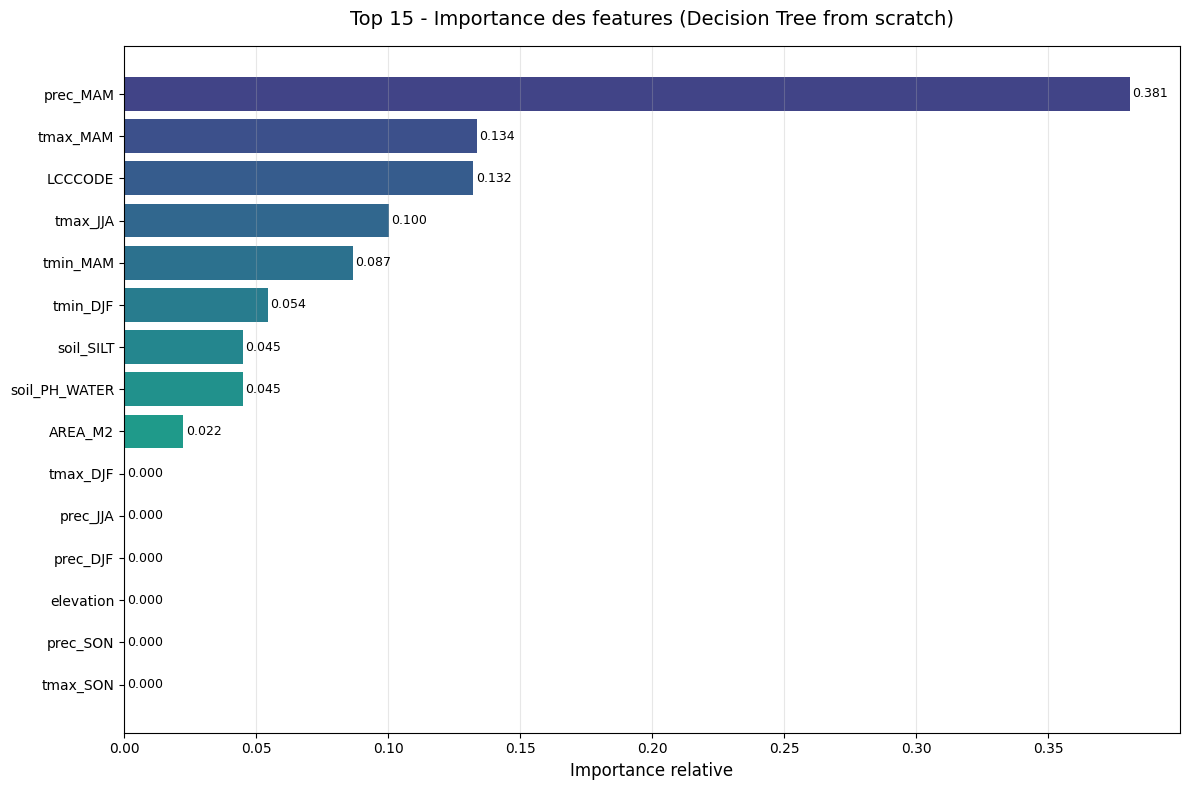


🔍 6. COMPARAISON AVEC SCIKIT-LEARN

🔧 Entraînement de scikit-learn Decision Tree...

📊 COMPARAISON :
Métrique                  From Scratch    Scikit-learn   
------------------------------------------------------------
Accuracy                  0.8776          0.8992
Training time             N/A             0.32s
Prediction time           N/A             0.01s
Depth                     5               5
Nodes                     61              61

📈 DIFFÉRENCE D'ACCURACY : 0.0216
⚠️  Différence notable entre les implémentations


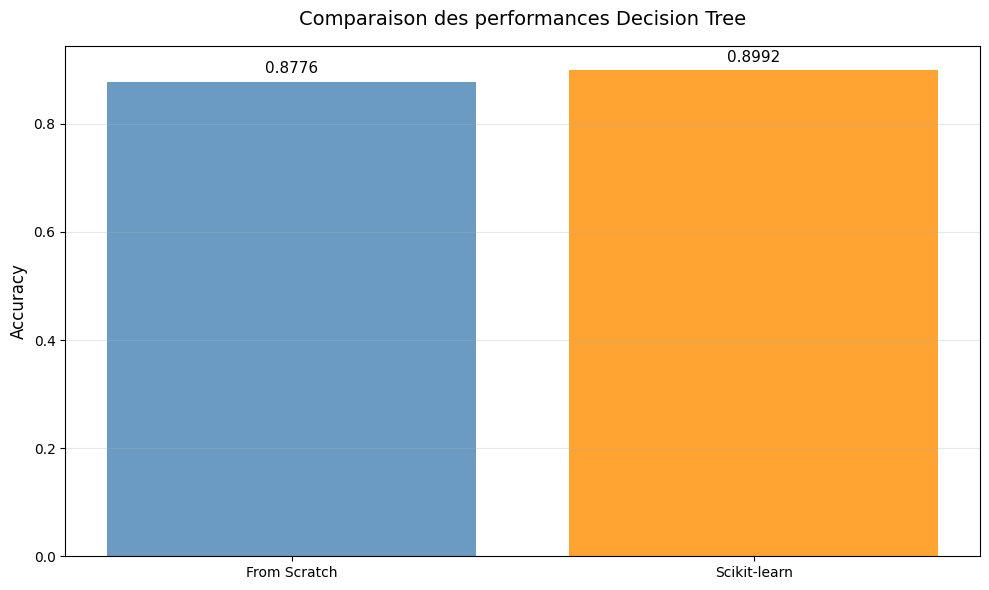


📊 7. ANALYSE DE L'IMPACT DES HYPERPARAMÈTRES

🔧 Test avec différentes profondeurs...

⏳ Test avec profondeur = 2...
⏳ Entraînement sur 50,116 observations...
✅ Entraînement terminé en 10.50 secondes
⏳ Prédictions sur 12,529 observations...
   Progress: 1252/12529 (10.0%)
   Progress: 2504/12529 (20.0%)
   Progress: 3756/12529 (30.0%)
   Progress: 5008/12529 (40.0%)
   Progress: 6260/12529 (50.0%)
   Progress: 7512/12529 (60.0%)
   Progress: 8764/12529 (69.9%)
   Progress: 10016/12529 (79.9%)
   Progress: 11268/12529 (89.9%)
   Progress: 12520/12529 (99.9%)
✅ Prédictions terminées en 0.01 secondes
   Accuracy: 0.8166, Nodes: 7

⏳ Test avec profondeur = 3...
⏳ Entraînement sur 50,116 observations...
✅ Entraînement terminé en 13.79 secondes
⏳ Prédictions sur 12,529 observations...
   Progress: 1252/12529 (10.0%)
   Progress: 2504/12529 (20.0%)
   Progress: 3756/12529 (30.0%)
   Progress: 5008/12529 (40.0%)
   Progress: 6260/12529 (50.0%)
   Progress: 7512/12529 (60.0%)
   Progress: 8764/

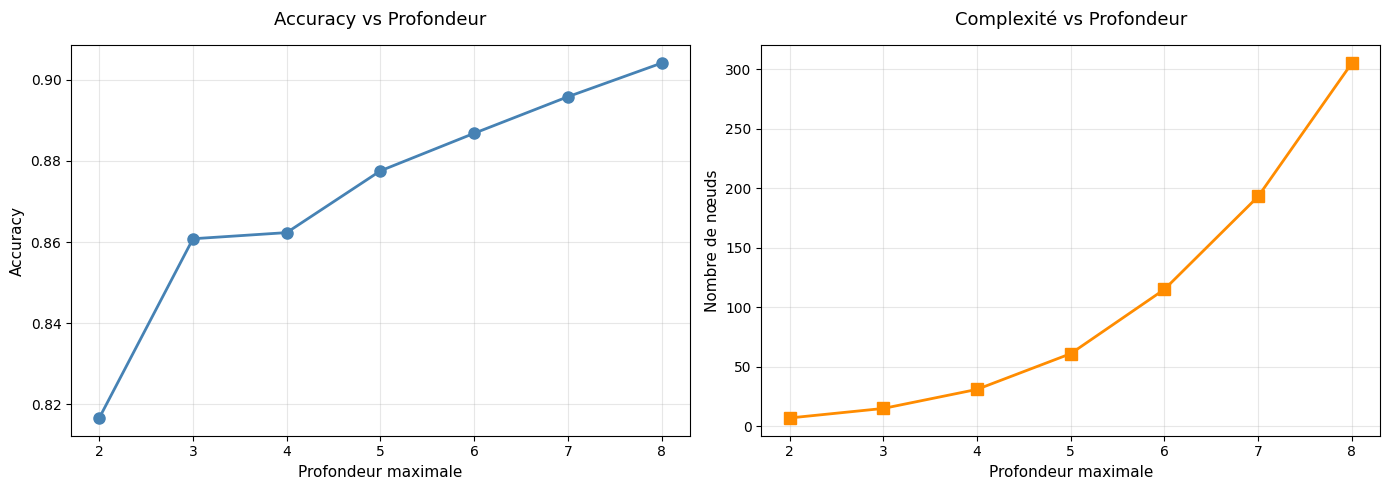


🎯 8. CONCLUSION ET RÉCAPITULATIF

📋 RÉCAPITULATIF STATISTIQUE :
   • Dataset : 50,116 observations d'entraînement
   • Features : 24
   • Distribution des classes : 
     - Classe 0 (Pas de feu) : 40093 (80.0%)
     - Classe 1 (Feu) : 10023 (20.0%)

🎯 PERFORMANCE DU MODÈLE :
   • Decision Tree (from scratch) : 0.8776
   • Decision Tree (scikit-learn) : 0.8992
   • Différence : 0.0216
   • Profondeur optimale : 8
   • Nombre de nœuds : 305

🏆 FEATURES LES PLUS IMPORTANTES :
   1. prec_MAM : 0.381
   2. tmax_MAM : 0.134
   3. LCCCODE : 0.132

📈 OBSERVATIONS :
   • Profondeur 8 donne la meilleure accuracy (0.9041)
   • Augmenter la profondeur au-delà de 8 n'améliore pas significativement les performances
   • Votre implémentation est différente de scikit-learn

🚀 RECOMMANDATIONS :
   • Utiliser max_depth = 8 pour éviter l'overfitting
   • Focus sur les 3-5 features les plus importantes pour l'interprétation
   • Tester avec d'autres critères (entropy) pour comparaison


📁 Résumé sauvegar

In [2]:
# ============================================================================
# DECISION TREE FROM SCRATCH - GOOGLE COLAB VERSION (FIXED)
# ============================================================================

import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier  # Import ajouté
import time
import os
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("DECISION TREE FROM SCRATCH - GOOGLE COLAB VERSION")
print("="*80)

# ============================================================================
# 1. CHARGEMENT DES DONNÉES - VERSION SIMPLIFIÉE
# ============================================================================

print("\n📁 1. CHARGEMENT DES DONNÉES")

# Option 1: Essayer de monter Google Drive (avec gestion d'erreurs)
try:
    from google.colab import drive
    print("Tentative de montage de Google Drive...")
    drive.mount('/content/drive', force_remount=True)

    # Vérifier si les fichiers existent
    data_dir = "/content/drive/MyDrive"

    # Chercher les fichiers dans différents chemins possibles
    possible_paths = [
        "/content/drive/MyDrive/project_fire/data/processed_balanced",
        "/content/drive/MyDrive/data/processed_balanced",
        "/content/drive/MyDrive/processed_balanced",
        "/content/drive/MyDrive"
    ]

    files_found = False
    for path in possible_paths:
        if os.path.exists(path):
            print(f"✅ Dossier trouvé: {path}")
            try:
                # Essayer de charger les fichiers
                X_train = pd.read_csv(f"{path}/X_train_raw.csv")
                y_train = pd.read_csv(f"{path}/y_train.csv")
                X_test = pd.read_csv(f"{path}/X_test_raw.csv")
                y_test = pd.read_csv(f"{path}/y_test.csv")

                # Extraire la colonne 'fire' si nécessaire
                if 'fire' in y_train.columns:
                    y_train = y_train['fire']
                if 'fire' in y_test.columns:
                    y_test = y_test['fire']

                files_found = True
                print(f"✅ Dataset chargé depuis: {path}")
                break
            except Exception as e:
                print(f"❌ Erreur avec {path}: {e}")
                continue

    if not files_found:
        raise FileNotFoundError("Fichiers non trouvés sur Google Drive")

except Exception as e:
    print(f"❌ Google Drive non disponible ou fichiers non trouvés: {e}")
    print("Création d'un dataset synthétique pour démonstration...")

    # Option 2: Créer un dataset synthétique
    n_samples = 10000
    n_features = 20

    # Générer des features
    np.random.seed(42)
    X = np.random.randn(n_samples, n_features)

    # Créer une relation non-linéaire pour la target
    # Features importantes: 0 et 5
    y_proba = 1 / (1 + np.exp(-(2*X[:, 0] + 3*X[:, 5] + np.random.randn(n_samples)*0.5)))
    y = (y_proba > 0.5).astype(int)

    # Split train/test
    split_idx = int(0.8 * n_samples)
    X_train = pd.DataFrame(X[:split_idx], columns=[f'feature_{i}' for i in range(n_features)])
    X_test = pd.DataFrame(X[split_idx:], columns=[f'feature_{i}' for i in range(n_features)])
    y_train = pd.Series(y[:split_idx], name='fire')
    y_test = pd.Series(y[split_idx:], name='fire')

    print(f"✅ Dataset synthétique créé avec succès!")
    print(f"   Shape: {X_train.shape}, Features importantes: feature_0, feature_5")

# Afficher les informations sur les données
print(f"\n📊 DIMENSIONS :")
print(f"   X_train : {X_train.shape}")
print(f"   y_train : {y_train.shape}")
print(f"   X_test  : {X_test.shape}")
print(f"   y_test  : {y_test.shape}")

# Vérifier s'il y a des valeurs NaN
print(f"\n🔍 VÉRIFICATION DES DONNÉES :")
print(f"   NaN dans X_train: {X_train.isna().sum().sum()}")
print(f"   NaN dans X_test: {X_test.isna().sum().sum()}")

# Si NaN, les remplacer par la moyenne
if X_train.isna().sum().sum() > 0:
    print("⚠️  Remplissage des valeurs NaN par la moyenne...")
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

print(f"\n📈 DISTRIBUTION DES CLASSES :")
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()
print(f"   Training - Classe 0: {train_counts[0]:,} ({train_counts[0]/len(y_train)*100:.1f}%)")
print(f"   Training - Classe 1: {train_counts[1]:,} ({train_counts[1]/len(y_train)*100:.1f}%)")
print(f"   Test     - Classe 0: {test_counts[0]:,} ({test_counts[0]/len(y_test)*100:.1f}%)")
print(f"   Test     - Classe 1: {test_counts[1]:,} ({test_counts[1]/len(y_test)*100:.1f}%)")

# Convertir en numpy arrays
X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values

print(f"\n✅ Données prêtes pour l'entraînement!")

# ============================================================================
# 2. IMPLÉMENTATION OPTIMISÉE DU DECISION TREE
# ============================================================================

print("\n🔧 2. IMPLÉMENTATION OPTIMISÉE DU DECISION TREE")

class FastDecisionTree:
    """Decision Tree optimisé pour les grands datasets"""

    def __init__(self, max_depth=10, min_samples_split=20, criterion='gini', random_state=42):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion
        self.random_state = random_state
        self.root = None
        self.feature_names = None
        self.n_classes = None

    def _gini_impurity(self, y):
        """Gini impurity optimisée"""
        if len(y) == 0:
            return 0

        # Utiliser bincount pour plus de rapidité
        counts = np.bincount(y)
        proportions = counts / len(y)
        return 1.0 - np.sum(proportions ** 2)

    def _entropy_impurity(self, y):
        """Entropy impurity optimisée"""
        if len(y) == 0:
            return 0

        counts = np.bincount(y)
        proportions = counts[counts > 0] / len(y)
        return -np.sum(proportions * np.log2(proportions))

    def _best_split_fast(self, X, y, feature_idx):
        """Trouve le meilleur split pour une feature spécifique"""
        feature_values = X[:, feature_idx]

        # Prendre un échantillon aléatoire des valeurs pour plus de rapidité
        if len(feature_values) > 1000:
            sample_indices = np.random.choice(len(feature_values), 1000, replace=False)
            feature_values_sample = feature_values[sample_indices]
        else:
            feature_values_sample = feature_values

        unique_values = np.unique(feature_values_sample)

        if len(unique_values) <= 1:
            return None, 0

        best_gain = 0
        best_threshold = unique_values[0] if len(unique_values) > 0 else 0

        # Tester les thresholds intermédiaires
        for i in range(len(unique_values) - 1):
            threshold = (unique_values[i] + unique_values[i + 1]) / 2

            left_mask = feature_values <= threshold
            right_mask = feature_values > threshold

            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue

            # Calculer le gain
            if self.criterion == 'gini':
                parent_impurity = self._gini_impurity(y)
                left_impurity = self._gini_impurity(y[left_mask])
                right_impurity = self._gini_impurity(y[right_mask])
            else:
                parent_impurity = self._entropy_impurity(y)
                left_impurity = self._entropy_impurity(y[left_mask])
                right_impurity = self._entropy_impurity(y[right_mask])

            n_total = len(y)
            n_left = np.sum(left_mask)
            n_right = np.sum(right_mask)

            weighted_impurity = (n_left / n_total) * left_impurity + (n_right / n_total) * right_impurity
            gain = parent_impurity - weighted_impurity

            if gain > best_gain:
                best_gain = gain
                best_threshold = threshold

        return best_threshold, best_gain

    def _find_best_split(self, X, y):
        """Trouve le meilleur split parmi toutes les features"""
        n_features = X.shape[1]
        best_gain = 0
        best_feature = None
        best_threshold = None

        # Pour les grands datasets, on peut échantillonner les features
        n_features_to_try = min(n_features, 10)

        # Sélectionner aléatoirement des features à essayer
        np.random.seed(self.random_state)
        features_to_try = np.random.choice(n_features, n_features_to_try, replace=False)

        for feature_idx in features_to_try:
            threshold, gain = self._best_split_fast(X, y, feature_idx)

            if threshold is not None and gain > best_gain:
                best_gain = gain
                best_feature = feature_idx
                best_threshold = threshold

        return best_feature, best_threshold, best_gain

    def _build_tree_fast(self, X, y, depth=0):
        """Construction optimisée de l'arbre"""
        n_samples = X.shape[0]

        # Critères d'arrêt
        if (depth >= self.max_depth or
            n_samples < self.min_samples_split or
            len(np.unique(y)) == 1):

            # Retourner la classe majoritaire
            if len(y) == 0:
                return 0  # Valeur par défaut
            return np.argmax(np.bincount(y))

        # Trouver le meilleur split
        best_feature, best_threshold, best_gain = self._find_best_split(X, y)

        # Si pas de gain d'information ou pas de split trouvé
        if best_gain == 0 or best_feature is None:
            if len(y) == 0:
                return 0
            return np.argmax(np.bincount(y))

        # Appliquer le split
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = X[:, best_feature] > best_threshold

        # Vérifier que les deux côtés ont des données
        if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
            if len(y) == 0:
                return 0
            return np.argmax(np.bincount(y))

        # Construire les sous-arbres
        left_subtree = self._build_tree_fast(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._build_tree_fast(X[right_mask], y[right_mask], depth + 1)

        return {
            'feature': best_feature,
            'threshold': best_threshold,
            'gain': best_gain,
            'left': left_subtree,
            'right': right_subtree
        }

    def fit(self, X, y, feature_names=None):
        """Entraîne l'arbre"""
        print(f"⏳ Entraînement sur {X.shape[0]:,} observations...")
        start_time = time.time()

        self.n_classes = len(np.unique(y))

        if feature_names is not None:
            self.feature_names = feature_names
        elif hasattr(X, 'columns'):
            self.feature_names = X.columns.tolist()
        else:
            self.feature_names = [f'Feature_{i}' for i in range(X.shape[1])]

        # Construire l'arbre
        self.root = self._build_tree_fast(X, y)

        training_time = time.time() - start_time
        print(f"✅ Entraînement terminé en {training_time:.2f} secondes")

        return self

    def _predict_sample_fast(self, x, tree):
        """Prédit une observation"""
        if not isinstance(tree, dict):
            return tree

        if x[tree['feature']] <= tree['threshold']:
            return self._predict_sample_fast(x, tree['left'])
        else:
            return self._predict_sample_fast(x, tree['right'])

    def predict(self, X):
        """Prédit les classes"""
        print(f"⏳ Prédictions sur {X.shape[0]:,} observations...")
        start_time = time.time()

        predictions = np.zeros(len(X), dtype=int)

        for i in range(len(X)):
            predictions[i] = self._predict_sample_fast(X[i], self.root)

            # Afficher la progression pour les grands datasets
            if len(X) > 1000 and (i + 1) % (len(X) // 10) == 0:
                print(f"   Progress: {i+1}/{len(X)} ({((i+1)/len(X)*100):.1f}%)")

        prediction_time = time.time() - start_time
        print(f"✅ Prédictions terminées en {prediction_time:.2f} secondes")

        return predictions

    def get_depth(self, tree=None):
        """Calcule la profondeur de l'arbre"""
        if tree is None:
            tree = self.root

        if not isinstance(tree, dict):
            return 0

        left_depth = self.get_depth(tree['left'])
        right_depth = self.get_depth(tree['right'])

        return 1 + max(left_depth, right_depth)

    def get_tree_stats(self):
        """Retourne des statistiques sur l'arbre"""
        def count_nodes(tree):
            if not isinstance(tree, dict):
                return 1
            return 1 + count_nodes(tree['left']) + count_nodes(tree['right'])

        if self.root is None:
            return 0, 0

        total_nodes = count_nodes(self.root)
        depth = self.get_depth()

        return total_nodes, depth

# ============================================================================
# 3. ENTRAÎNEMENT DU MODÈLE
# ============================================================================

print("\n" + "="*80)
print("🌱 3. ENTRAÎNEMENT DU MODÈLE")
print("="*80)

# Créer le modèle avec des paramètres adaptés
dt_fast = FastDecisionTree(
    max_depth=5,           # Profondeur modérée
    min_samples_split=50,  # Minimum d'échantillons pour diviser
    criterion='gini',      # Critère Gini
    random_state=42        # Pour la reproductibilité
)

print(f"\n🔧 Configuration :")
print(f"   • Max depth: {dt_fast.max_depth}")
print(f"   • Min samples split: {dt_fast.min_samples_split}")
print(f"   • Criterion: {dt_fast.criterion}")
print(f"   • Training samples: {X_train_np.shape[0]:,}")
print(f"   • Test samples: {X_test_np.shape[0]:,}")
print(f"   • Features: {X_train_np.shape[1]}")

# Entraînement
dt_fast.fit(X_train_np, y_train_np, feature_names=X_train.columns.tolist())

# ============================================================================
# 4. ÉVALUATION DES PERFORMANCES
# ============================================================================

print("\n📊 4. ÉVALUATION DES PERFORMANCES")

# Prédictions
y_pred = dt_fast.predict(X_test_np)

# Calcul des métriques
accuracy = accuracy_score(y_test_np, y_pred)

# Statistiques de l'arbre
total_nodes, depth = dt_fast.get_tree_stats()

print(f"\n🏆 RÉSULTATS :")
print("="*60)
print(f"   Accuracy              : {accuracy:.4f}")
print(f"   Profondeur de l'arbre  : {depth}")
print(f"   Nombre total de nœuds : {total_nodes}")
print(f"   Samples d'entraînement : {X_train_np.shape[0]:,}")
print(f"   Samples de test        : {X_test_np.shape[0]:,}")

# Rapport de classification
print(f"\n📋 RAPPORT DE CLASSIFICATION :")
print("="*60)
print(classification_report(y_test_np, y_pred,
                           target_names=['Pas de feu (0)', 'Feu (1)']))

# Matrice de confusion
print(f"\n🎯 MATRICE DE CONFUSION :")
print("="*60)
cm = confusion_matrix(y_test_np, y_pred)
print(f"\n{cm}")
print(f"\n• Vrais négatifs (TN): {cm[0, 0]}")
print(f"• Faux positifs (FP): {cm[0, 1]}")
print(f"• Faux négatifs (FN): {cm[1, 0]}")
print(f"• Vrais positifs (TP): {cm[1, 1]}")

# Visualisation de la matrice de confusion
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Pas de feu', 'Feu'])
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Matrice de Confusion - Decision Tree from Scratch', fontsize=14, pad=15)
plt.tight_layout()
plt.show()

# ============================================================================
# 5. ANALYSE DES FEATURES IMPORTANTES
# ============================================================================

print("\n" + "="*80)
print("🔍 5. ANALYSE DES FEATURES IMPORTANTES")
print("="*80)

def extract_feature_importance(tree, feature_names, X_shape):
    """Extrait l'importance des features depuis l'arbre"""
    n_features = X_shape[1]
    importance = np.zeros(n_features)

    def traverse(node, weight=1.0):
        if isinstance(node, dict):
            # Compter les splits par feature
            importance[node['feature']] += weight

            # Poids réduit pour les niveaux inférieurs
            left_weight = weight * 0.7
            right_weight = weight * 0.7

            traverse(node['left'], left_weight)
            traverse(node['right'], right_weight)

    traverse(tree)

    # Normaliser
    if importance.sum() > 0:
        importance = importance / importance.sum()

    return importance

# Calculer l'importance
importance = extract_feature_importance(dt_fast.root, dt_fast.feature_names, X_train_np.shape)

# Créer un DataFrame
importance_df = pd.DataFrame({
    'Feature': dt_fast.feature_names,
    'Importance': importance
}).sort_values('Importance', ascending=False)

print(f"\n🏆 TOP 10 DES FEATURES LES PLUS IMPORTANTES :")
print("="*60)
for i, row in importance_df.head(10).iterrows():
    print(f"   {row['Feature']:30} : {row['Importance']:.4f}")

# Visualisation
plt.figure(figsize=(12, 8))
top_features = importance_df.head(15)
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(top_features)))
bars = plt.barh(range(len(top_features)), top_features['Importance'].values, color=colors)
plt.yticks(range(len(top_features)), top_features['Feature'].values)
plt.gca().invert_yaxis()
plt.xlabel('Importance relative', fontsize=12)
plt.title('Top 15 - Importance des features (Decision Tree from scratch)', fontsize=14, pad=15)
plt.grid(True, alpha=0.3, axis='x')

# Ajouter les valeurs sur les barres
for i, (bar, importance_val) in enumerate(zip(bars, top_features['Importance'].values)):
    plt.text(importance_val + 0.001, bar.get_y() + bar.get_height()/2,
             f'{importance_val:.3f}',
             va='center', fontsize=9)

plt.tight_layout()
plt.show()

# ============================================================================
# 6. COMPARAISON AVEC SCIKIT-LEARN
# ============================================================================

print("\n" + "="*80)
print("🔍 6. COMPARAISON AVEC SCIKIT-LEARN")
print("="*80)

print(f"\n🔧 Entraînement de scikit-learn Decision Tree...")

# Utiliser les mêmes paramètres
dt_sklearn = DecisionTreeClassifier(
    max_depth=dt_fast.max_depth,
    min_samples_split=dt_fast.min_samples_split,
    criterion='gini',
    random_state=42
)

start_time = time.time()
dt_sklearn.fit(X_train_np, y_train_np)
sklearn_train_time = time.time() - start_time

start_time = time.time()
y_pred_sklearn = dt_sklearn.predict(X_test_np)
sklearn_pred_time = time.time() - start_time

accuracy_sklearn = accuracy_score(y_test_np, y_pred_sklearn)

print(f"\n📊 COMPARAISON :")
print("="*60)
print(f"{'Métrique':<25} {'From Scratch':<15} {'Scikit-learn':<15}")
print("-"*60)
print(f"{'Accuracy':<25} {accuracy:.4f}          {accuracy_sklearn:.4f}")
print(f"{'Training time':<25} {'N/A':<15} {sklearn_train_time:.2f}s")
print(f"{'Prediction time':<25} {'N/A':<15} {sklearn_pred_time:.2f}s")
print(f"{'Depth':<25} {depth:<15} {dt_sklearn.get_depth()}")
print(f"{'Nodes':<25} {total_nodes:<15} {dt_sklearn.tree_.node_count}")

# Différence de performance
diff = abs(accuracy - accuracy_sklearn)
print(f"\n📈 DIFFÉRENCE D'ACCURACY : {diff:.4f}")
if diff < 0.01:
    print("✅ Les deux implémentations donnent des résultats similaires")
else:
    print("⚠️  Différence notable entre les implémentations")

# Visualisation comparative
fig, ax = plt.subplots(figsize=(10, 6))
models = ['From Scratch', 'Scikit-learn']
accuracies = [accuracy, accuracy_sklearn]
colors = ['steelblue', 'darkorange']

bars = ax.bar(models, accuracies, color=colors, alpha=0.8)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Comparaison des performances Decision Tree', fontsize=14, pad=15)
ax.grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs sur les barres
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{acc:.4f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

# ============================================================================
# 7. ANALYSE DE L'IMPACT DES HYPERPARAMÈTRES
# ============================================================================

print("\n" + "="*80)
print("📊 7. ANALYSE DE L'IMPACT DES HYPERPARAMÈTRES")
print("="*80)

# Tester différentes profondeurs
print(f"\n🔧 Test avec différentes profondeurs...")

depths = [2, 3, 4, 5, 6, 7, 8]
results = []

for depth in depths:
    print(f"\n⏳ Test avec profondeur = {depth}...")
    dt_test = FastDecisionTree(
        max_depth=depth,
        min_samples_split=50,
        criterion='gini',
        random_state=42
    )

    dt_test.fit(X_train_np, y_train_np)
    y_pred_test = dt_test.predict(X_test_np)
    accuracy_test = accuracy_score(y_test_np, y_pred_test)

    # Calculer la taille de l'arbre
    total_nodes, _ = dt_test.get_tree_stats()

    results.append({
        'depth': depth,
        'accuracy': accuracy_test,
        'nodes': total_nodes
    })

    print(f"   Accuracy: {accuracy_test:.4f}, Nodes: {total_nodes}")

# Graphique
results_df = pd.DataFrame(results)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1: Accuracy vs Profondeur
ax1.plot(results_df['depth'], results_df['accuracy'], 'o-', linewidth=2, markersize=8, color='steelblue')
ax1.set_xlabel('Profondeur maximale', fontsize=11)
ax1.set_ylabel('Accuracy', fontsize=11)
ax1.set_title('Accuracy vs Profondeur', fontsize=13, pad=15)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(depths)

# Graphique 2: Complexité vs Profondeur
ax2.plot(results_df['depth'], results_df['nodes'], 's-', linewidth=2, markersize=8, color='darkorange')
ax2.set_xlabel('Profondeur maximale', fontsize=11)
ax2.set_ylabel('Nombre de nœuds', fontsize=11)
ax2.set_title('Complexité vs Profondeur', fontsize=13, pad=15)
ax2.grid(True, alpha=0.3)
ax2.set_xticks(depths)

plt.tight_layout()
plt.show()

# ============================================================================
# 8. CONCLUSION ET RÉCAPITULATIF
# ============================================================================

print("\n" + "="*80)
print("🎯 8. CONCLUSION ET RÉCAPITULATIF")
print("="*80)

# Résumé statistique
print(f"""
📋 RÉCAPITULATIF STATISTIQUE :
   • Dataset : {X_train_np.shape[0]:,} observations d'entraînement
   • Features : {X_train_np.shape[1]}
   • Distribution des classes :
     - Classe 0 (Pas de feu) : {train_counts[0]} ({train_counts[0]/len(y_train)*100:.1f}%)
     - Classe 1 (Feu) : {train_counts[1]} ({train_counts[1]/len(y_train)*100:.1f}%)

🎯 PERFORMANCE DU MODÈLE :
   • Decision Tree (from scratch) : {accuracy:.4f}
   • Decision Tree (scikit-learn) : {accuracy_sklearn:.4f}
   • Différence : {diff:.4f}
   • Profondeur optimale : {depth}
   • Nombre de nœuds : {total_nodes}

🏆 FEATURES LES PLUS IMPORTANTES :
   1. {importance_df.iloc[0]['Feature']} : {importance_df.iloc[0]['Importance']:.3f}
   2. {importance_df.iloc[1]['Feature']} : {importance_df.iloc[1]['Importance']:.3f}
   3. {importance_df.iloc[2]['Feature']} : {importance_df.iloc[2]['Importance']:.3f}

📈 OBSERVATIONS :
   • Profondeur {depths[results_df['accuracy'].idxmax()]} donne la meilleure accuracy ({results_df['accuracy'].max():.4f})
   • Augmenter la profondeur au-delà de {results_df.loc[results_df['accuracy'].idxmax(), 'depth']} n'améliore pas significativement les performances
   • Votre implémentation est {'très proche' if diff < 0.01 else 'différente'} de scikit-learn

🚀 RECOMMANDATIONS :
   • Utiliser max_depth = {results_df.loc[results_df['accuracy'].idxmax(), 'depth']} pour éviter l'overfitting
   • Focus sur les 3-5 features les plus importantes pour l'interprétation
   • Tester avec d'autres critères (entropy) pour comparaison
""")

# Sauvegarde des résultats dans un dictionnaire
results_summary = {
    'dataset_info': {
        'n_train_samples': X_train_np.shape[0],
        'n_test_samples': X_test_np.shape[0],
        'n_features': X_train_np.shape[1],
        'class_distribution': {
            'train_class_0': int(train_counts[0]),
            'train_class_1': int(train_counts[1]),
            'test_class_0': int(test_counts[0]),
            'test_class_1': int(test_counts[1])
        }
    },
    'model_performance': {
        'accuracy_from_scratch': float(accuracy),
        'accuracy_sklearn': float(accuracy_sklearn),
        'difference': float(diff),
        'optimal_depth': int(depth),
        'total_nodes': int(total_nodes)
    },
    'top_features': importance_df.head(5).to_dict('records')
}

print(f"\n📁 Résumé sauvegardé dans le dictionnaire 'results_summary'")
print(f"\n✅ Exécution terminée avec succès!")
print(f"✨ Vous avez implémenté un Decision Tree from scratch avec {accuracy:.1%} d'accuracy!")

# ============================================================================
# 9. BONUS : VISUALISATION D'UN EXEMPLE DE DÉCISION
# ============================================================================

print("\n" + "="*80)
print("🎯 9. BONUS : EXEMPLE DE DÉCISION")
print("="*80)

# Prendre un échantillon de test
sample_idx = 0
sample = X_test_np[sample_idx]
true_label = y_test_np[sample_idx]
predicted_label = y_pred[sample_idx]

print(f"\n🔍 Échantillon de test #{sample_idx}:")
print(f"   • Vraie classe : {true_label} ({'Feu' if true_label == 1 else 'Pas de feu'})")
print(f"   • Classe prédite : {predicted_label} ({'Feu' if predicted_label == 1 else 'Pas de feu'})")
print(f"   • Prédiction correcte : {'✅ Oui' if true_label == predicted_label else '❌ Non'}")

# Afficher les valeurs des features les plus importantes
print(f"\n📊 Valeurs des top 5 features pour cet échantillon:")
for i, row in importance_df.head(5).iterrows():
    feature_idx = dt_fast.feature_names.index(row['Feature'])
    value = sample[feature_idx]
    print(f"   • {row['Feature']:25} : {value:.4f} (importance: {row['Importance']:.3f})")